In [172]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
import optax
import jax

|██████████| 100.0% ◆ elapsed 218.12ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 25.17it/s]


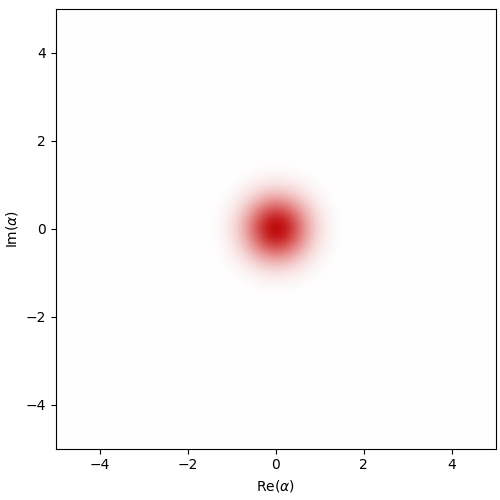

In [246]:
# 1.1 starts here
(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

kappa_b = 10
epsilon_d = -4
g2 = 1.0

H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
H = H2ph + Hd

tsave = jnp.linspace(0, 4, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b], psi0, tsave)
rho = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho)

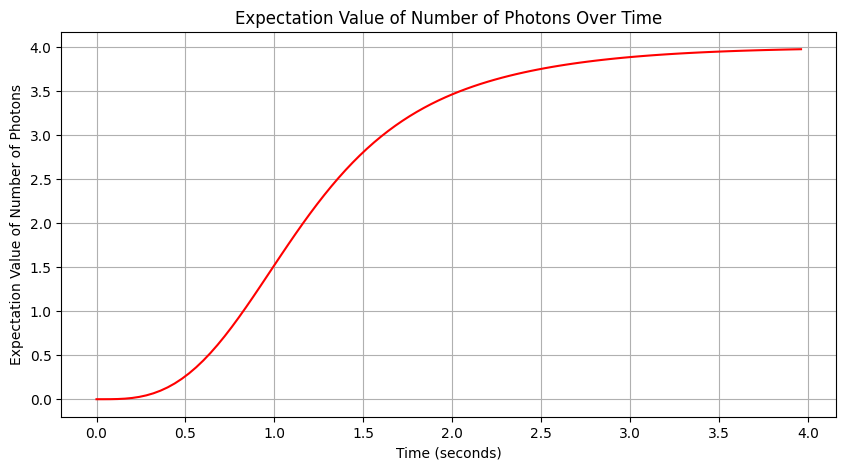

In [9]:
exp_n = dq.expect(dq.number(na), rho)

# x axis is time with 4/100 second intervals
# y axis is going expectation value of number of photons (exp_n) at each point

# Define the time axis with 4/100 second intervals
time = np.arange(len(exp_n)) * (4 / 100)  # 4/100 seconds per interval
# Creating the plot with proper labels
plt.figure(figsize=(10, 5))
plt.plot(time, exp_n.real, marker='', linestyle='-', color='r')
plt.title("Expectation Value of Number of Photons Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Expectation Value of Number of Photons")
plt.grid(True)

# Show the plot
plt.show()


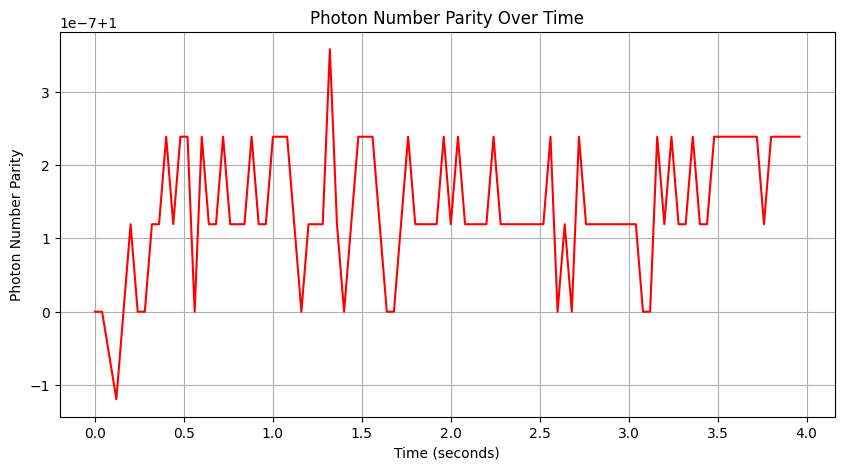

In [70]:
par_n = dq.expect(dq.parity(na), rho)

# x axis is time with 4/100 second intervals
# y axis is photon number parity (par_n) at each point

# Define the time axis with 4/100 second intervals
time = np.arange(len(par_n)) * (4 / 100)  # 4/100 seconds per interval
# Creating the plot with proper labels
plt.figure(figsize=(10, 5))
plt.plot(time, par_n.real, marker='', linestyle='-', color='r')
plt.title("Photon Number Parity Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Photon Number Parity")
plt.grid(True)

# Show the plot
plt.show()

|██████████| 100.0% ◆ elapsed 386.77ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:02<00:00, 22.70it/s]


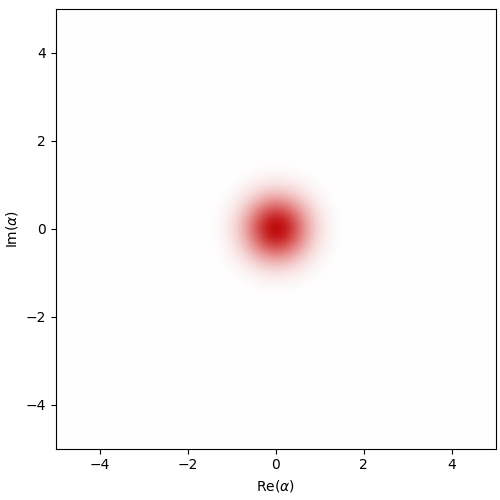

In [7]:
# 1.2 starts here
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -epsilon_d / jnp.conj(g2)
tsave = jnp.linspace(0, 4, 100)

res = dq.mesolve(H, [jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(*a.dims))], psi0, tsave)
rhoa = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rhoa)

|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms     
100%|██████████| 50/50 [00:03<00:00, 15.83it/s]


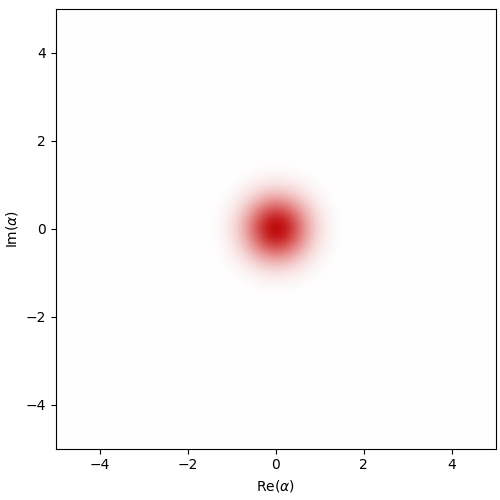

In [8]:
kappa_b = 2
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -epsilon_d / jnp.conj(g2)

res = dq.mesolve(H, [jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(*a.dims))], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0))

|██████████| 100.0% ◆ elapsed 471.78ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:02<00:00, 23.77it/s]


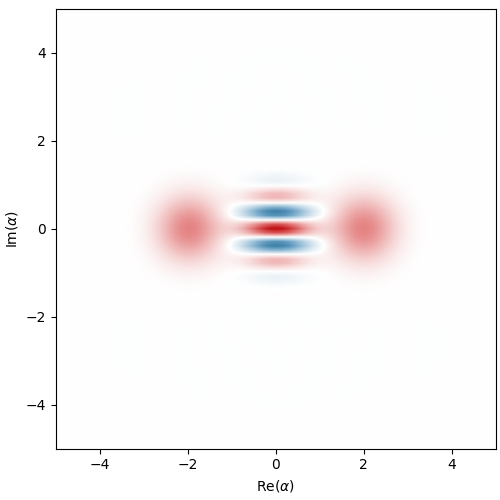

In [98]:
alpha = 2
o = a
odag = o.dag()
plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
psi0 = dq.tensor(plus, dq.fock(nb, 0))

epsilon_z = 0.25

H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
Hz = jnp.conj(epsilon_z) * o + epsilon_z * odag
H = H2ph + Hd + Hz

tsave = jnp.linspace(0, 8, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b], psi0, tsave)
rho = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho)

|██████████| 100.0% ◆ elapsed 530.35ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:02<00:00, 21.52it/s]


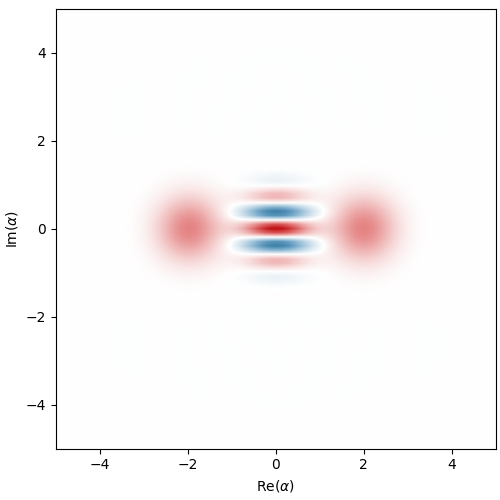

In [99]:
# 1.3 starts here 
alpha = 2
o = a
odag = o.dag()
plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
psi0 = dq.tensor(plus, dq.fock(nb, 0))

epsilon_z = 0.25
kappa_a = 0.1

H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
Hz = jnp.conj(epsilon_z) * o + epsilon_z * odag
H = H2ph + Hd + Hz

tsave = jnp.linspace(0, 8, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_a) * a + jnp.sqrt(kappa_b) * b], psi0, tsave)
rho = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho)

In [100]:
def z_flip(epsilon_z, kappa_a):
    alpha = 2
    o = a
    odag = o.dag()
    plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
    psi0 = dq.tensor(plus, dq.fock(nb, 0))

    H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
    Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
    Hz = jnp.conj(epsilon_z) * o + epsilon_z * odag
    H = H2ph + Hd + Hz

    tsave = jnp.linspace(0, 8, 100)
    res = dq.mesolve(H, [jnp.sqrt(kappa_a) * a + jnp.sqrt(kappa_b) * b], psi0, tsave)
    rho = dq.ptrace(res.states, 0)
    return dq.expect(dq.parity(na), rho)

/var/folders/z0/18qdb7n54gbdsc1tdlc78lgm0000gn/T/ipykernel_8423/3854928111.py:11: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  Hz = jnp.conj(epsilon_z) * o + epsilon_z * odag
/var/folders/z0/18qdb7n54gbdsc1tdlc78lgm0000gn/T/ipykernel_8423/3854928111.py:12: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  H = H2ph + Hd + Hz
|██████████| 100.0% ◆ elapsed 617.82ms ◆ remaining 0.00ms  
/var/folders/z0/18qdb7n54gbdsc1tdlc78lgm0000gn/T/ipykernel_8423/3854928111.py:11: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  Hz = jnp.conj(epsilon_z) * o + epsilon_z * odag
/var/folders/z0/18qdb7n54gbdsc1tdlc78lgm0000gn/T/ipykernel_8423/3854928111.py:12: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  H = H2ph + Hd + Hz
|██████████| 1

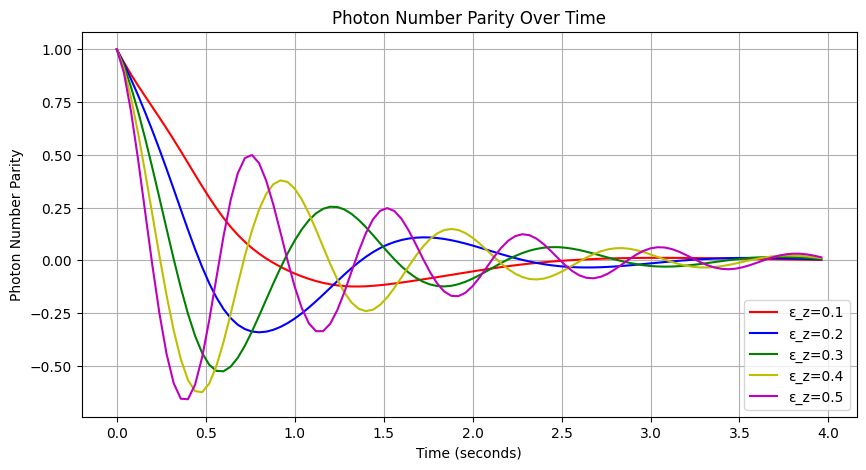

In [97]:
pars_n = [z_flip(epsilon_z, 0.1) for epsilon_z in np.arange(0.1,0.6,0.1)]

# x axis is time with 4/100 second intervals
# y axis is photon number parity (par_n) at each point

# Define the time axis with 4/100 second intervals
time = np.arange(len(pars_n[0])) * (4 / 100)  # 4/100 seconds per interval
# Creating the plot with proper labels
plt.figure(figsize=(10, 5))
for i in range(0, len(pars_n)):
    plt.plot(time, pars_n[i], marker='', linestyle='-', color=['r','b','g','y','m'][i])
plt.legend(["ε_z="+str(round(i, 1)) for i in np.arange(0.1,0.6,0.1)], loc="lower right")
plt.title("Photon Number Parity Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Photon Number Parity")
plt.grid(True)

# Show the plot
plt.show()

|██████████| 100.0% ◆ elapsed 461.45ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 524.10ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 530.22ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 457.75ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 489.77ms ◆ remaining 0.00ms  
/Users/adamgodel/2025-Alice-and-Bob/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/adamgodel/2025-Alice-and-Bob/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


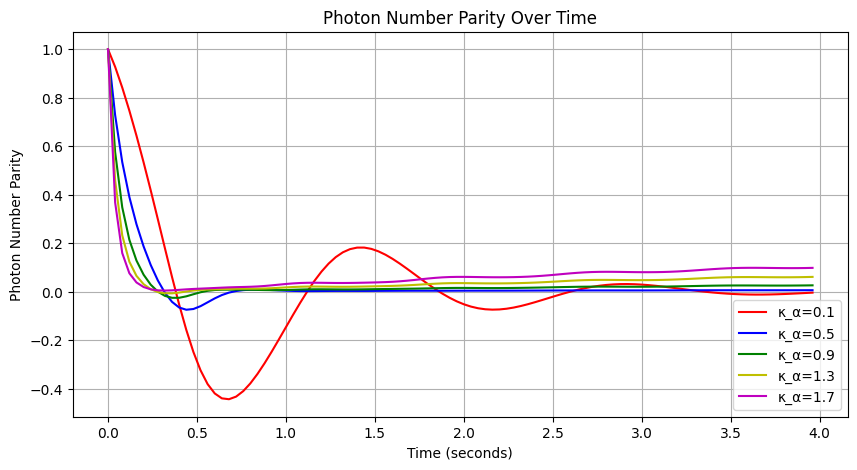

In [104]:
pars_n = [z_flip(0.25, kappa_a) for kappa_a in np.arange(0.1,2,0.4)]

# x axis is time with 4/100 second intervals
# y axis is photon number parity (par_n) at each point

# Define the time axis with 4/100 second intervals
time = np.arange(len(pars_n[0])) * (4 / 100)  # 4/100 seconds per interval
# Creating the plot with proper labels
plt.figure(figsize=(10, 5))
for i in range(0, len(pars_n)):
    plt.plot(time, pars_n[i], marker='', linestyle='-', color=['r','b','g','y','m'][i])
plt.legend(["κ_α="+str(round(i, 1)) for i in np.arange(0.1,2.1,0.4)], loc="lower right")
plt.title("Photon Number Parity Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Photon Number Parity")
plt.grid(True)

# Show the plot
plt.show()

In [268]:
# 1.4 starts here
(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

kappa_b = 10
g2 = 1.0

ntpulse = 101
nepochs = 300
learning_rate = 0.2
bins = 30

def compute_epsilon_d(amps):
    H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
    Hd = dq.pwc(np.linspace(0, 3, bins), amps, a+adag)
    H = H2ph + Hd

    result = dq.mesolve(H, [jnp.sqrt(kappa_b) * b], psi0, tsave)
    rho = dq.ptrace(result.states, 0)

    return jnp.absolute(dq.expect(dq.number(na), rho[-1]))

@jax.jit
def compute_epsilon_d_loss(amps, weight=1.0):
    return weight * (1 - compute_epsilon_d(amps))

@jax.jit
def compute_alpha_sq_loss(amps, weight=1.0):
    return weight * (4.0 - compute_epsilon_d(amps)/jnp.conj(g2))

optimizer = optax.adam(learning_rate)
amps = jnp.array([-4+0j]*(bins-1))
opt_state = optimizer.init(amps)
losses = []
for _ in range(nepochs):
    epsilon_d_loss, epsilon_d_grad = jax.value_and_grad(compute_epsilon_d_loss)(amps)
    alpha_sq_loss, alpha_sq_grad = jax.value_and_grad(compute_alpha_sq_loss)(amps)
    grads = epsilon_d_grad + alpha_sq_grad

    updates, opt_state = optimizer.update(grads.conj(), opt_state)
    amps = optax.apply_updates(amps, updates)

    losses.append([epsilon_d_loss, alpha_sq_loss])

losses = jnp.asarray(losses)

|██████████| 100.0% ◆ elapsed 385.22ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 329.01ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 325.56ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 325.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 336.84ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 337.77ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 346.77ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 343.49ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 334.03ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 356.35ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 367.41ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 368.03ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 405.21ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 435.55ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 547.77ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 412.42ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 362.01ms ◆

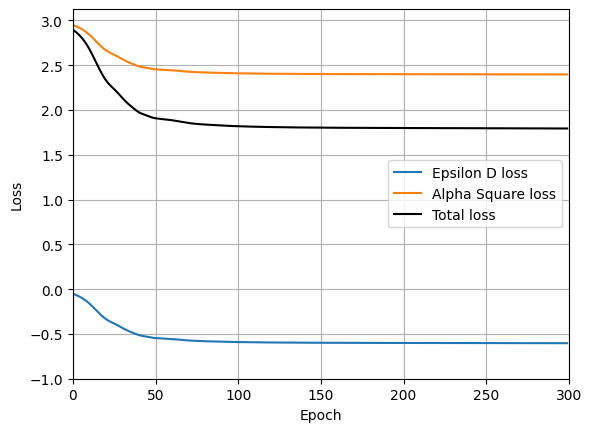

In [269]:
plt.plot(losses[:, 0], label="Epsilon D loss")
plt.plot(losses[:, 1], label="Alpha Square loss")
plt.plot(losses[:, 0] + losses[:, 1], c='k', label="Total loss")
plt.ylim(-1)
plt.xlim(0, nepochs)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.grid(True)
plt.show()

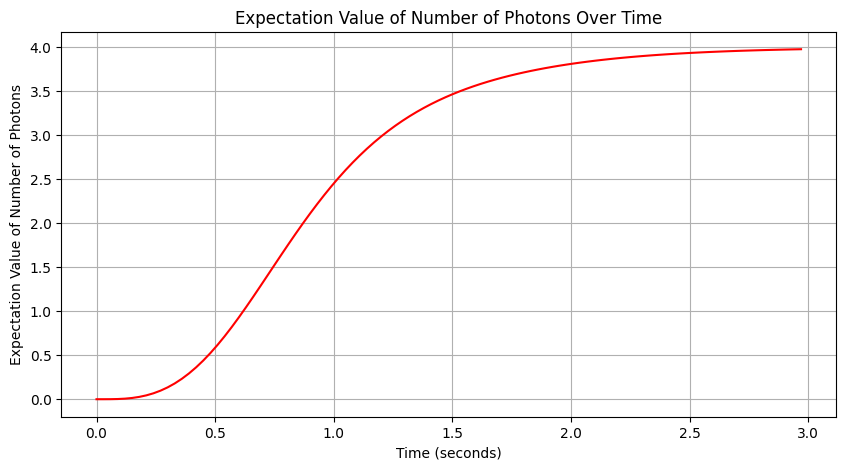

In [270]:
exp_n = dq.expect(dq.number(na), rho)

# x axis is time with 3/100 second intervals
# y axis is going expectation value of number of photons (exp_n) at each point

# Define the time axis with 3/100 second intervals
time = np.arange(len(exp_n)) * (3 / 100)  # 3/100 seconds per interval
# Creating the plot with proper labels
plt.figure(figsize=(10, 5))
plt.plot(time, exp_n.real, marker='', linestyle='-', color='r')
plt.title("Expectation Value of Number of Photons Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Expectation Value of Number of Photons")
plt.grid(True)

# Show the plot
plt.show()

/Users/adamgodel/2025-Alice-and-Bob/.venv/lib/python3.12/site-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|██████████| 100.0% ◆ elapsed 26m03s ◆ remaining 0.00ms  
100%|██████████| 50/50 [26:05<00:00, 31.31s/it]


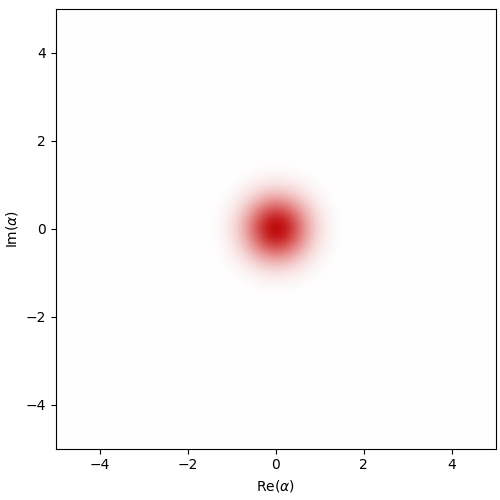

In [271]:
# start of 2.1
(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

h = 6.62607015e-34 * 1e6
omega_a0 = 5.26 * 1000
omega_b0 = 7.70 * 1000
phi_a = 0.06
phi_b = 0.29
Ej = 12.03 * 1000
delta_Ej = 0.47 * 1000
omega_d = 7.623 * 1000
omega_p = 2.891 *  1000
epsilon_d = -3.815 
epsilon_p = 0.122


phi_hat = phi_a * (a + adag) + phi_b * (b + bdag)

f0 = lambda t: omega_a0 * (adag @ a) + omega_b0 * (bdag @ b)
epsilon = lambda t: epsilon_p * jnp.cos(omega_p * t)
fATS = lambda t: (
    -2 * Ej * jnp.sin(epsilon(t)) * dq.sinm(phi_hat)
    + 2 * delta_Ej * jnp.cos(epsilon(t)) * dq.cosm(phi_hat) 
)
fD = lambda t: 2 * epsilon_d * jnp.cos(omega_d * t) * (b + bdag)
H = dq.timecallable(f0) + dq.timecallable(fATS) + dq.timecallable(fD)

kappa_a = 9.3 / 1000
kappa_b = 2.6

tsave = jnp.linspace(0, 3, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a], psi0, tsave, solver = dq.solver.Tsit5(max_steps = 1000000000))
rho = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho)